 # Report


# Function 

In [1]:
import baseline_model as model
from dataloader import Dataloader
from evaluation import Evaluator
import os
from datetime import timedelta
from matplotlib import pyplot as plt

dl_config_path = os.path.join('config', 'config.yml')
api_config_path = os.path.join('config', 'api_config.yml')
eval_config_path = os.path.join('config', 'evaluation_config.yml')

param_api_id = "yf24xCq95gJkorzBWb16GAP4eOxQNVZR"
param_api_secret = "sWkUzN3a8uC8QDu1V64bH3bAtCdduf74Xh8JnT_OrYZf_x2ObWdiNkOga59cB2C5Q9us9tW0bg4zFg4BfeOR7mRzui3ROZ1QHI0i"

In [2]:
# Main function calling everything
def f(date_from, date_to, api_id, api_secret):
    # Load Data
        
    dataloader = Dataloader(dl_config_path, '2018-12-25', date_to, api_id, api_secret)
    dataframe = dataloader.load()
    

    # Preprocess Data
    dataframe.fillna(0.0, inplace=True)

    print("finished preprocessing. predicting...")

    # Pass entire Dataframe to model (which might not use all cols/rows)
    #market_strategy = model.main(date_from, date_to, api_id, api_secret)
    market_strategy = model.predict(date_from, date_to, dataframe)
    
    print("strat")
    print(market_strategy)
    # return market_strategy
    #print(market_strategy[0:50])

    print("finish market strategy. evaluating...")
    # Evaluate strategy passing the same Dataframe to the evaluator
    evaluator = Evaluator(
        start= date_from,
        end = date_to, 
        evalution_config_path=eval_config_path,
        dataframe=dataframe,
        result_df=market_strategy
        )
    
    # Export Evaluation
    
    return evaluator.evaluate()

In [3]:
result_df = f('2019-01-01', '2019-01-06', param_api_id, param_api_secret)
#print(result_df)
result_df.iloc[0:50]

In [ ]:
result_df

,timestamp,E_sold_spot,E_sold_intraday,imbalance,actual_pv_production,pnl_spot,pnl_id,pnl_imbalance,pnl
0,2019-01-01 00:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-01 01:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-01 02:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-01 03:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 04:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
115,2019-01-05 19:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
116,2019-01-05 20:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
117,2019-01-05 21:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
118,2019-01-05 22:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


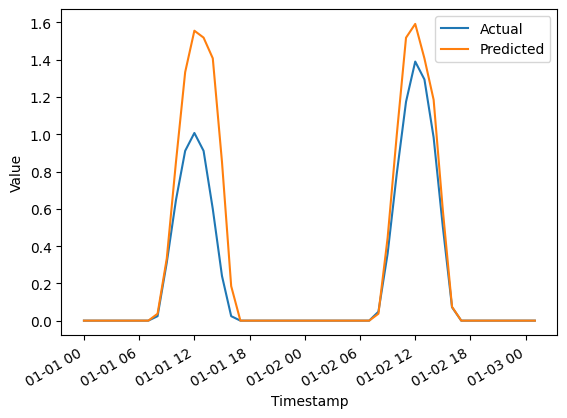

In [ ]:
# result_df[['timestamp', 'E_sold_spot', 'actual_pv_production']].plot()
df = result_df[0:100]
plt.plot(df['timestamp'], df['actual_pv_production'], label='Actual')
plt.plot(df['timestamp'], df['E_sold_spot'], label='Predicted')
# plt.plot(df['timestamp'], df['pnl'], label='Penalty')
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

plt.show()